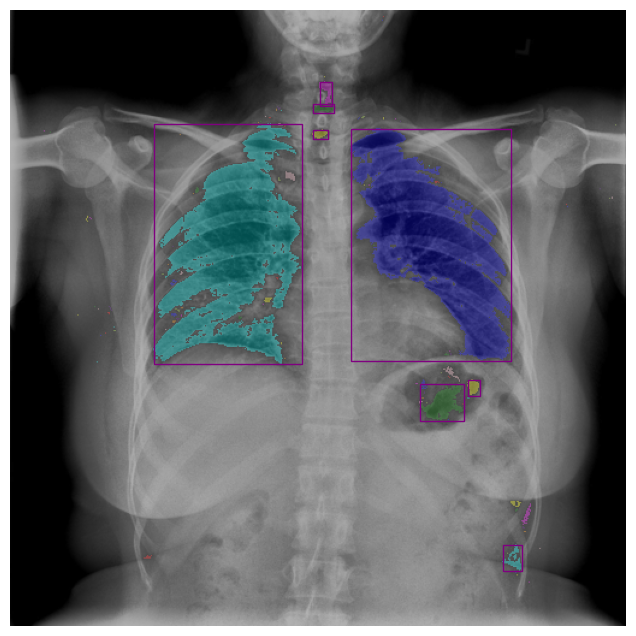

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from PIL import Image

class ImageSegmentation:
    def __init__(self, input_shape, clip_limit=0.01, sqr_value=1):
        self.input_shape = input_shape
        self.clip_limit = clip_limit
        self.sqr_value = sqr_value

    def segmentize(self, X, return_only_overlay=True):
        X = X[:, :, 0]
        X = exposure.equalize_adapthist(X, clip_limit=self.clip_limit, nbins=256)
        thresh = threshold_otsu(image=X, nbins=256, hist=None)
        thresh = X > thresh
        closing_image = closing(X > thresh, square(self.sqr_value))
        cleared = clear_border(closing_image)
        label_image = label(cleared)
        image_label_overlay = label2rgb(label_image, image=X, bg_label=0, bg_color=(0, 0, 0))
        if return_only_overlay:
            return image_label_overlay, label_image
        else:
            return X, thresh, closing_image, cleared, image_label_overlay, label_image

    def create_rectangle_box(self, ax, label_image):
        region_sum = 0
        for region in regionprops(label_image):
            region_sum += region.area
        region_avg = region_sum / len(label_image)
        for region in regionprops(label_image):
            if region.area >= region_avg:
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='purple', linewidth=1)
                ax.add_patch(rect)
        return region_sum

    def display(self, image_path):
        image = io.imread(image_path)
        fig, ax = plt.subplots(figsize=(8, 8))
        image_label_overlay, label_image = self.segmentize(image)
        ax.imshow(image_label_overlay)
        self.create_rectangle_box(ax, label_image)
        plt.axis('off')
        plt.show()

def main():
    input_image_path = 'Normal-998.png'  # Replace with the path to your X-ray image
    segmentation = ImageSegmentation(input_shape=(128, 128))
    segmentation.display(input_image_path)

if __name__ == '__main__':
    main()


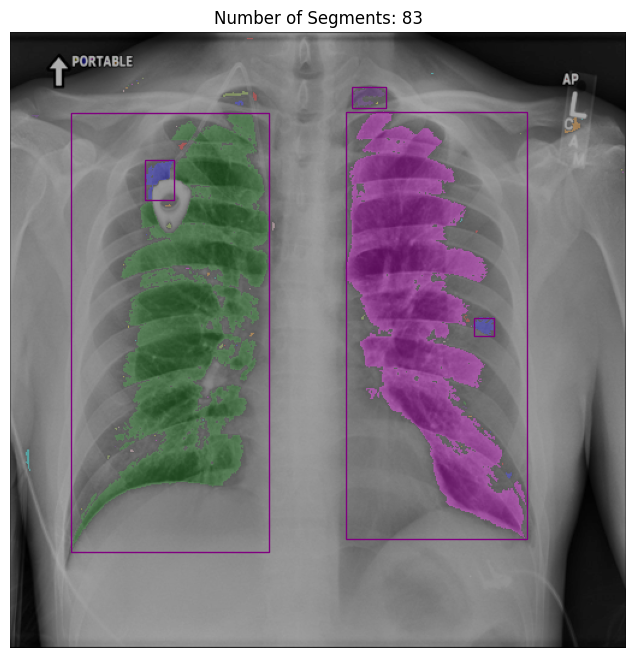

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from PIL import Image

class ImageSegmentation:
    def __init__(self, input_shape, clip_limit=0.01, sqr_value=1):
        self.input_shape = input_shape
        self.clip_limit = clip_limit
        self.sqr_value = sqr_value

    def segmentize(self, X, return_only_overlay=True):
        X = X[:, :, 0]
        X = exposure.equalize_adapthist(X, clip_limit=self.clip_limit, nbins=256)
        thresh = threshold_otsu(image=X, nbins=256, hist=None)
        thresh = X > thresh
        closing_image = closing(X > thresh, square(self.sqr_value))
        cleared = clear_border(closing_image)
        label_image = label(cleared)
        image_label_overlay = label2rgb(label_image, image=X, bg_label=0, bg_color=(0, 0, 0))
        if return_only_overlay:
            return image_label_overlay, label_image
        else:
            return X, thresh, closing_image, cleared, image_label_overlay, label_image

    def create_rectangle_box(self, ax, label_image):
        region_sum = 0
        for region in regionprops(label_image):
            region_sum += region.area
        region_avg = region_sum / len(label_image)
        for region in regionprops(label_image):
            if region.area >= region_avg:
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='purple', linewidth=1)
                ax.add_patch(rect)
        return region_sum

    def display(self, image_path):
        image = io.imread(image_path)
        fig, ax = plt.subplots(figsize=(8, 8))
        image_label_overlay, label_image = self.segmentize(image)
        ax.imshow(image_label_overlay)
        self.create_rectangle_box(ax, label_image)
        num_segments = len(np.unique(label_image)) - 1  # Subtract 1 to exclude the background
        plt.title(f"Number of Segments: {num_segments}")
        plt.axis('off')
        plt.show()

def main():
    input_image_path = 'Normal-996.png'  # Replace with the path to your X-ray image
    segmentation = ImageSegmentation(input_shape=(128, 128))
    segmentation.display(input_image_path)

if __name__ == '__main__':
    main()


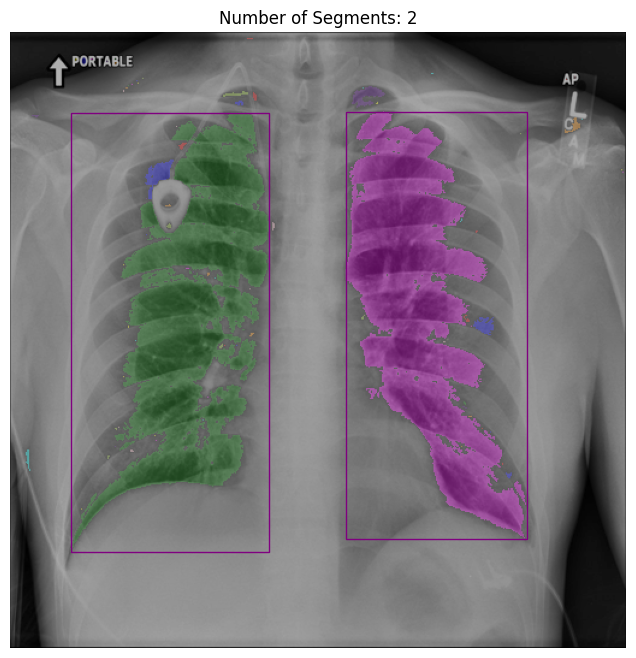

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.color import label2rgb, rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from PIL import Image

class ImageSegmentation:
    def __init__(self, input_shape, clip_limit=0.01, sqr_value=1):
        self.input_shape = input_shape
        self.clip_limit = clip_limit
        self.sqr_value = sqr_value

    def segmentize(self, X, return_only_overlay=True):
        # Ensure the image is grayscale
        if X.ndim == 3:
            X = rgb2gray(X)
        X = exposure.equalize_adapthist(X, clip_limit=self.clip_limit, nbins=256)
        thresh = threshold_otsu(image=X, nbins=256)
        thresh = X > thresh
        closing_image = closing(X > thresh, square(self.sqr_value))
        cleared = clear_border(closing_image)
        label_image = label(cleared)
        image_label_overlay = label2rgb(label_image, image=X, bg_label=0, bg_color=(0, 0, 0))
        if return_only_overlay:
            return image_label_overlay, label_image
        else:
            return X, thresh, closing_image, cleared, image_label_overlay, label_image

    def create_rectangle_box(self, ax, label_image):
        region_sum = 0
        rectangles = []
        for region in regionprops(label_image):
            region_sum += region.area
        region_avg = region_sum / len(regionprops(label_image))
        for region in regionprops(label_image):
            if region.area >= region_avg:
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='purple', linewidth=1)
                ax.add_patch(rect)
                rectangles.append(rect)
        return len(rectangles)

    def display(self, image_path):
        image = io.imread(image_path)
        fig, ax = plt.subplots(figsize=(8, 8))
        image_label_overlay, label_image = self.segmentize(image)
        ax.imshow(image_label_overlay)
        num_rectangles = self.create_rectangle_box(ax, label_image)
        plt.title(f"Number of Segments: {num_rectangles}")
        plt.axis('off')
        plt.show()

def main():
    input_image_path = 'Normal-996.png'  # Replace with the path to your X-ray image
    segmentation = ImageSegmentation(input_shape=(128, 128))
    segmentation.display(input_image_path)

if __name__ == '__main__':
    main()


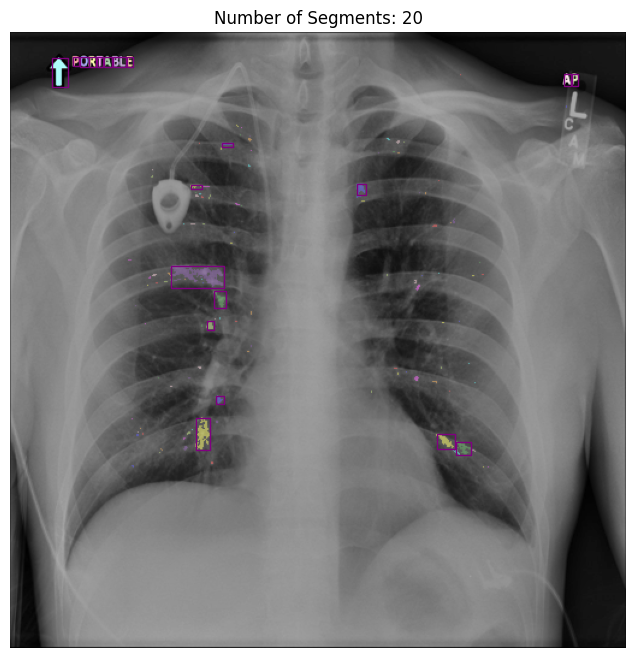

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.color import label2rgb, rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

class ImageSegmentation:
    def __init__(self, input_shape, clip_limit=0.01, sqr_value=1):
        self.input_shape = input_shape
        self.clip_limit = clip_limit
        self.sqr_value = sqr_value

    def segmentize(self, X, return_only_overlay=True):
        # Ensure the image is grayscale
        if X.ndim == 3:
            X = rgb2gray(X)
        # Apply CLAHE to enhance contrast
        X = exposure.equalize_adapthist(X, clip_limit=self.clip_limit, nbins=256)
        # Apply Otsu's thresholding
        thresh = threshold_otsu(image=X, nbins=256)
        thresh = X > thresh
        # Apply morphological closing
        closing_image = closing(thresh, square(self.sqr_value))
        # Clear borders
        cleared = clear_border(closing_image)
        # Label the image
        label_image = label(cleared)
        # Create an overlay image with colored segments
        image_label_overlay = label2rgb(label_image, image=X, bg_label=0, bg_color=(0, 0, 0))
        if return_only_overlay:
            return image_label_overlay, label_image
        else:
            return X, thresh, closing_image, cleared, image_label_overlay, label_image

    def create_rectangle_box(self, ax, label_image):
        region_sum = 0
        rectangles = []
        # Calculate average region area
        for region in regionprops(label_image):
            region_sum += region.area
        region_avg = region_sum / len(regionprops(label_image))
        for region in regionprops(label_image):
            if region.area >= region_avg:
                # Draw a rectangle around each significant region
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='purple', linewidth=1)
                ax.add_patch(rect)
                rectangles.append(rect)
        return len(rectangles)

    def display(self, image_path):
        image = io.imread(image_path)
        fig, ax = plt.subplots(figsize=(8, 8))
        image_label_overlay, label_image = self.segmentize(image)
        ax.imshow(image_label_overlay)
        num_rectangles = self.create_rectangle_box(ax, label_image)
        plt.title(f"Number of Segments: {num_rectangles}")
        plt.axis('off')
        plt.show()

def main():
    input_image_path = 'Normal-996.png'  # Replace with the path to your X-ray image
    segmentation = ImageSegmentation(input_shape=(128, 128))
    segmentation.display(input_image_path)

if __name__ == '__main__':
    main()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.color import gray2rgb
from skimage.transform import resize
import cv2
from tensorflow.keras.models import load_model

# Load your trained Keras model
model = load_model('trainedmodel.h5')

class LimeExplainer:
    def __init__(self, model, input_shape):
        self.model = model
        self.input_shape = input_shape
        self.explainer = lime_image.LimeImageExplainer()
    
    def predict_fn(self, images):
        images = np.stack([resize(image, self.input_shape) for image in images])
        return self.model.predict(images)
    
    def explain(self, image, top_labels=1, num_samples=100, num_features=5, segmentation_fn='slic'):
        explanation = self.explainer.explain_instance(
            image,
            self.predict_fn,
            top_labels=top_labels,
            hide_color=0,
            num_samples=num_samples,
            segmentation_fn=segmentation_fn
        )
        
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=False,
            num_features=num_features,
            hide_rest=False
        )
        
        return mark_boundaries(temp / 2 + 0.5, mask)

    def display_explanation(self, image, explanation_image):
        fig, ax = plt.subplots(1, 2, figsize=(8, 8))
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title("Original Image")
        ax[0].axis('off')
        
        ax[1].imshow(explanation_image)
        ax[1].set_title("LIME Explanation")
        ax[1].axis('off')
        
        plt.show()

def main():
    input_shape = (128, 128, 3)  # Define the input shape your model expects
    explainer = LimeExplainer(model, input_shape)
    
    # Load an example image (replace with your image path)
    image_path = 'Normal-996.png'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = gray2rgb(image)  # Convert to 3-channel image
    image = resize(image, input_shape[:2])  # Resize to model's input shape

    # Explain the prediction for the example image
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.color import gray2rgb
from skimage.transform import resize
import cv2
from tensorflow.keras.models import load_model

# Load your trained Keras model
model = load_model('trainedmodel.h5')

class LimeExplainer:
    def __init__(self, model, input_shape):
        self.model = model
        self.input_shape = input_shape
        self.explainer = lime_image.LimeImageExplainer()
    
    def predict_fn(self, images):
        images = np.stack([resize(image, self.input_shape) for image in images])
        return self.model.predict(images)
    
    def explain(self, image, top_labels=1, num_samples=100, num_features=5, segmentation_fn='slic'):
        explanation = self.explainer.explain_instance(
            image,
            self.predict_fn,
            top_labels=top_labels,
            hide_color=0,
            num_samples=num_samples,
            segmentation_fn=segmentation_fn
        )
        
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=False,
            num_features=num_features,
            hide_rest=False
        )
        
        return mark_boundaries(temp / 2 + 0.5, mask)

    def display_explanation(self, image, explanation_image):
        fig, ax = plt.subplots(1, 2, figsize=(8, 8))
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title("Original Image")
        ax[0].axis('off')
        
        ax[1].imshow(explanation_image)
        ax[1].set_title("LIME Explanation")
        ax[1].axis('off')
        
        plt.show()

def main():
    input_shape = (128, 128, 3)  # Define the input shape your model expects
    explainer = LimeExplainer(model, input_shape)
    
    # Load an example image (replace with your image path)
    image_path = 'Normal-996.png'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = gray2rgb(image)  # Convert to 3-channel image
    image = resize(image, input_shape[:2])  # Resize to model's input shape

    # Explain the prediction for the example image
    explanation_image = explainer.explain(image)
    
    # Display the original and explained images
    explainer.display_explanation(image, explanation_image)

if __name__ == '__main__':
    main()


TypeError: 'str' object is not callable

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border, label2rgb, label
import matplotlib.patches as mpatches
import os

def segmentize_image(image, clip_limit=0.01, sqr_value=1):
    # Convert image to grayscale if it's not already
    if image.ndim == 3:
        image = rgb2gray(image)
    
    # Apply adaptive histogram equalization
    image = exposure.equalize_adapthist(image, clip_limit=clip_limit, nbins=256)
    
    # Apply Otsu's thresholding
    thresh = threshold_otsu(image, nbins=256)
    binary_image = image > thresh
    
    # Apply morphological operations
    binary_image = closing(binary_image, square(sqr_value))
    binary_image = clear_border(binary_image)
    
    # Label connected components
    label_image = label(binary_image)
    
    # Overlay labels on original image
    image_label_overlay = label2rgb(label_image, image=image, bg_label=0, bg_color=(0, 0, 0))
    
    return image_label_overlay, label_image

def create_rectangle_box(ax, label_image):
    region_sum = 0
    rectangles = []
    for region in regionprops(label_image):
        region_sum += region.area
    region_avg = region_sum / len(regionprops(label_image))
    for region in regionprops(label_image):
        if region.area >= region_avg:
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='purple', linewidth=1)
            ax.add_patch(rect)
            rectangles.append(rect)
    return len(rectangles)

def generate_seg(image_path):
    image = io.imread(image_path)
    fig, ax = plt.subplots(figsize=(8, 8))
    image_label_overlay, label_image = segmentize_image(image)
    ax.imshow(image_label_overlay)
    num_rectangles = create_rectangle_box(ax, label_image)
    plt.title(f"Number of Segments: {num_rectangles}")
    plt.axis('off')

    # Save the segmented image
    output_path = os.path.join("static", "lung_seg_gen.png")
    plt.savefig(output_path)
    plt.close()
    print(f"Segmented image saved as: {output_path}")

# Example usage:
generate_seg("Normal-996.png")


ImportError: cannot import name 'label2rgb' from 'skimage.segmentation' (c:\Python311\Lib\site-packages\skimage\segmentation\__init__.py)